In [141]:
import requests
import json
import prettytable
import pandas as pd
import os
import psycopg2
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pprint
import matplotlib.pyplot as plt


In [142]:
headers = {'Content-type': 'application/json'}

# Convert dict into a JSON string
data = json.dumps({"seriesid": ['LNS14000000','LAUMT123310000000003'],"startyear":"2009", "endyear":"2019", "registrationkey":"43cd87b06a5e4f5799b72697bc1d5f9f"})

# Sending post request and saving response as response object (p)
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)

# Create a python object 
json_data = json.loads(p.text)

# Pretty-printing a nested dictionary using "pprint" module:  prints the entries indented to match their nesting level.
pprint.pprint(json_data)

# Create a Dict with empty lists as values
result_dict = {'seriesID': [], 'periodname': [], 'year': [], 'period':[], 'value': []}

# Nested for loop to iterate through the json and append values to my previous dict
for series in json_data['Results']['series']:
        for item in series['data']:
            result_dict['seriesID'].append(series['seriesID'])
            result_dict['periodname'].append(item['periodName'])
            result_dict['year'].append(item['year'])
            result_dict['period'].append(item['period'])
            result_dict['value'].append(item['value'])
                                             

{'Results': {'series': [{'data': [{'footnotes': [{}],
                                   'latest': 'true',
                                   'period': 'M12',
                                   'periodName': 'December',
                                   'value': '3.5',
                                   'year': '2019'},
                                  {'footnotes': [{}],
                                   'period': 'M11',
                                   'periodName': 'November',
                                   'value': '3.5',
                                   'year': '2019'},
                                  {'footnotes': [{}],
                                   'period': 'M10',
                                   'periodName': 'October',
                                   'value': '3.6',
                                   'year': '2019'},
                                  {'footnotes': [{}],
                                   'period': 'M09',
                                

                                   'year': '2013'},
                                  {'footnotes': [{}],
                                   'period': 'M05',
                                   'periodName': 'May',
                                   'value': '7.2',
                                   'year': '2013'},
                                  {'footnotes': [{}],
                                   'period': 'M04',
                                   'periodName': 'April',
                                   'value': '7.0',
                                   'year': '2013'},
                                  {'footnotes': [{}],
                                   'period': 'M03',
                                   'periodName': 'March',
                                   'value': '7.2',
                                   'year': '2013'},
                                  {'footnotes': [{}],
                                   'period': 'M02',
                                   'periodN

In [97]:
# Create a dataframe using above dict
result_dict_df = pd.DataFrame(result_dict)

# Preview result_dict_df 
result_dict_df.head(10)

,seriesID,periodname,year,period,value
0,LNS14000000,December,2019,M12,3.5
1,LNS14000000,November,2019,M11,3.5
2,LNS14000000,October,2019,M10,3.6
3,LNS14000000,September,2019,M09,3.5
4,LNS14000000,August,2019,M08,3.7
5,LNS14000000,July,2019,M07,3.7
6,LNS14000000,June,2019,M06,3.7
7,LNS14000000,May,2019,M05,3.6
8,LNS14000000,April,2019,M04,3.6
9,LNS14000000,March,2019,M03,3.8


In [143]:
# Create a dataframe for serieid: LNS14000000 - US / Sort by value ascending 
national_unemployment_rate_df = result_dict_df[result_dict_df['seriesID'] == 'LNS14000000'].sort_values(by='year', ascending=True)

# Adding a new column to identofy the region corectly
national_unemployment_rate_df['region'] = 'US'

# Adding a key (id) column 
national_unemployment_rate_df['id'] = range (1, 1+len(national_unemployment_rate_df))

# Moving id column to the first place
national_unemployment_rate_df= national_unemployment_rate_df[['id','seriesID','periodname', 'year', 'period', 'value', 'region']]




In [144]:
# Create a dataframe for serieid: LAUMT123310000000003 -  Miami Area / Sort by value ascending
Miami_unemployment_rate_df = result_dict_df[result_dict_df['seriesID'] == 'LAUMT123310000000003'].sort_values(by='year', ascending=True)

# Adding a new column to identify the region corectly
Miami_unemployment_rate_df['region'] = 'Miami-Fort Lauderdale-West Palm Beach'


# Adding a key (id) column 
Miami_unemployment_rate_df['id'] = range (1, 1+len(Miami_unemployment_rate_df))

# Convert superkey from int to str
Miami_unemployment_rate_df['id'] = Miami_unemployment_rate_df['id'].astype(int)

# Moving id column to the first place
Miami_unemployment_rate_df = Miami_unemployment_rate_df[['id','seriesID','periodname', 'year', 'period', 'value', 'region']]

In [145]:
# Preview ational_unemployment_rate_df
national_unemployment_rate_df.head(10)


,id,seriesID,periodname,year,period,value,region
131,1,LNS14000000,January,2009,M01,7.8,US
120,2,LNS14000000,December,2009,M12,9.9,US
121,3,LNS14000000,November,2009,M11,9.9,US
122,4,LNS14000000,October,2009,M10,10.0,US
123,5,LNS14000000,September,2009,M09,9.8,US
124,6,LNS14000000,August,2009,M08,9.6,US
130,7,LNS14000000,February,2009,M02,8.3,US
126,8,LNS14000000,June,2009,M06,9.5,US
127,9,LNS14000000,May,2009,M05,9.4,US
128,10,LNS14000000,April,2009,M04,9.0,US


In [146]:
# Preview Miami_unemployment_rate_df
Miami_unemployment_rate_df.head(10)


,id,seriesID,periodname,year,period,value,region
262,1,LAUMT123310000000003,January,2009,M01,7.7,Miami-Fort Lauderdale-West Palm Beach
251,2,LAUMT123310000000003,December,2009,M12,10.9,Miami-Fort Lauderdale-West Palm Beach
252,3,LAUMT123310000000003,November,2009,M11,10.7,Miami-Fort Lauderdale-West Palm Beach
253,4,LAUMT123310000000003,October,2009,M10,11.1,Miami-Fort Lauderdale-West Palm Beach
254,5,LAUMT123310000000003,September,2009,M09,11.2,Miami-Fort Lauderdale-West Palm Beach
255,6,LAUMT123310000000003,August,2009,M08,11.2,Miami-Fort Lauderdale-West Palm Beach
261,7,LAUMT123310000000003,February,2009,M02,8.2,Miami-Fort Lauderdale-West Palm Beach
257,8,LAUMT123310000000003,June,2009,M06,10.9,Miami-Fort Lauderdale-West Palm Beach
258,9,LAUMT123310000000003,May,2009,M05,10.0,Miami-Fort Lauderdale-West Palm Beach
259,10,LAUMT123310000000003,April,2009,M04,8.6,Miami-Fort Lauderdale-West Palm Beach


In [133]:
# Load dotenv
load_dotenv()

# Create Engine - Accessing the Environment Variables
engine = create_engine(f"postgresql://{os.environ.get('DB_USERNAME')}:{os.environ.get('DB_PASSWORD')}@{os.environ.get('HOST')}/{os.environ.get('DB_NAME')}")


In [134]:
# Check for tables
engine.table_names()

['miami_unemployment', 'national_unemployment']

In [ ]:
# Use pandas to load json 'Region: US' converted DataFrame into database
national_unemployment_rate_df.to_sql(name='national_unemployment', con=engine, if_exists='append', index=False)

In [139]:
# Confirm data has been added by querying the customer_name table
pd.read_sql_query('select * from national_unemployment', con=engine).head()

,id,seriesID,periodname,year,period,value,region
0,1,LNS14000000,December,2019,M12,3.5,US
1,2,LNS14000000,November,2019,M11,3.5,US
2,3,LNS14000000,October,2019,M10,3.6,US
3,4,LNS14000000,September,2019,M09,3.5,US
4,5,LNS14000000,August,2019,M08,3.7,US


In [ ]:
# Use pandas to load json 'Region: Miami-Fort Lauderdale-West Palm Beach' converted DataFrame into database
Miami_unemployment_rate_df.to_sql(name='miami_unemployment', con=engine, if_exists='append', index=False)

In [116]:
# Confirm data has been added by querying the customer_name table
pd.read_sql_query('select * from miami_unemployment', con=engine).head()

,id,seriesID,periodname,year,period,value,region
0,1,LAUMT123310000000003,November,2019,M11,2.7,Miami-Fort Lauderdale-West Palm Beach
1,2,LAUMT123310000000003,October,2019,M10,2.9,Miami-Fort Lauderdale-West Palm Beach
2,3,LAUMT123310000000003,September,2019,M09,3.0,Miami-Fort Lauderdale-West Palm Beach
3,4,LAUMT123310000000003,August,2019,M08,3.5,Miami-Fort Lauderdale-West Palm Beach
4,5,LAUMT123310000000003,July,2019,M07,3.4,Miami-Fort Lauderdale-West Palm Beach


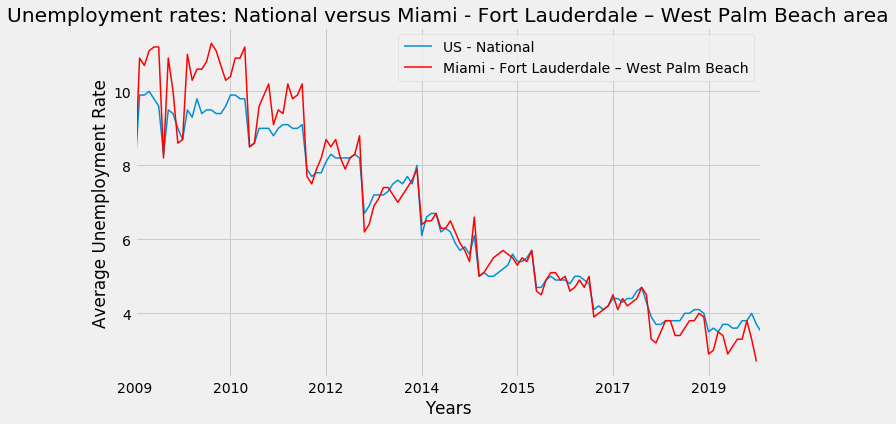

In [149]:
# Set Plot Style
plt.style.use('fivethirtyeight')

# Set Fig Size
fig = plt.figure(figsize=(10,6))


# gca stands for 'get current axis'
ax = plt.gca()

# Convert values (str) to float in both data frames (US, Miami)
national_unemployment_rate_df['value'] = national_unemployment_rate_df['value'].astype(float)
Miami_unemployment_rate_df['value'] = Miami_unemployment_rate_df['value'].astype(float)

# Group by year and calculate  average values (unemployment rate) in national_unemployment_rate data frame
national_unemployment_rate_df.groupby(['year'])[['value']].mean()

# Group by year and calculate  average values (unemployment rate) in Miami_unemployment_rate data frame
Miami_unemployment_rate_df.groupby(['year'])[['value']].mean()


national_unemployment_rate_df.plot(kind='line',x='year',y='value', lw=1.5, label='US - National', ax=ax)
Miami_unemployment_rate_df.plot(kind='line',x='year',y='value', lw=1.5, color='red', label='Miami - Fort Lauderdale – West Palm Beach', ax=ax)

# Set Plot Labels , Title and Legend
plt.ylabel("Average Unemployment Rate")
plt.xlabel("Years")
plt.title("Unemployment rates: National versus Miami - Fort Lauderdale – West Palm Beach area")

plt.savefig("unemployment_comparison.png", bbox_inches = 'tight')
plt.show()

